# Inaugural project

# Question 1

In this project we aim to find the optimal labor supply and consumption.

The following utility function and budget constraint are given.

In the utility function we are using that $c^* = x$ in optimum, such that we can write the budget constraint instead of 'c'.

In [1]:
#Importing relevant packages
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
# parameter values as given
m = 1   # cash-on-hand
v = 10 # scalar for disutility of labor
eps = 0.3 # Frisch elasticity
t0 = 0.4 # standard labor income tax
t1 = 0.1 # top bracket labor income tax
k = 0.4 # cut-off for top labor income tax

In [3]:
# Utility function
def u(l, w, m = 1, v = 10, eps = .3, t0 = .4, t1 = .1, k = .4):
    """
    The utility function: Utility increases monotonocally with larger consumption. 
    The utility decreases in labor, however the disutility of labor depends on the labor elasticity.
    Args: c: consumption, l: labor, eps: Frisch elasticity of labor supply, v: scales the disutility of labor.
    Returns: Float
    """
    return np.log(tr(w, l)) - v * (l ** (1 + 1/eps))/(1 + 1/eps)

# Constraint function
def tr(l, w, m = 1, v = 10, eps = .3, t0 = .4, t1 = .1, k = .4):
    """
    Constraint function: In maximum the consumer will use all ressources on consumption, therefore c = tr(w,l).
    Args: m: cash-on-hand, w: wage rate, t0: standard labor income tax, 
    t1: top bracket labor income tax, k: cut-off for the top labor income bracket.
    Returns: Float
    """
    return m + w * l - (t0 * w*l + t1 * max([w * l - k, 0]))

To calculate the optimal labor supply we use the optimize.minimze function from the scipy package. As we're looking for a optimum, we insert a - before the minimizer.

In [4]:
# Bounds for the variable l
bounds = [(0, 1)]

# Call optimizer
initial_guess = 1  # some guess, should be feasible
res = optimize.minimize(lambda l: -u(l, w=1), 
initial_guess,method='SLSQP', bounds=bounds)

The solution yields the following labor supply, consumption and utility.

In [5]:
# Print results
print('In optimum we have the following:')
print('Labour is ' + f'{float(res.x):.2f}')
print("Consumption is " + f'{float(tr(l=res.x, w=1)):.2f}')
print("Utility is " + f'{-1*res.fun:.2f}')

In optimum we have the following:
Labour is 0.40
Consumption is 1.24
Utility is 0.17


# Question 2

Plotting labor and consumption as function of wages in range .5 to 1.5

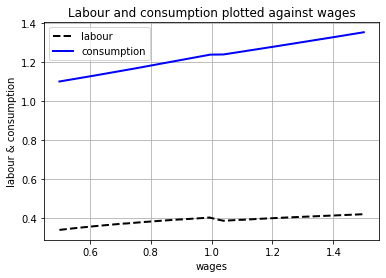

In [14]:
#set sample size
N = 10000
#plot of l(w) and c(w)

#Initiating figure
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

#Define variables for wage (0.5, 1.5)
w_vec = np.linspace(0.5,1.5,N)
lab = np.empty(N)
con = np.empty(N)

def tr(l, w, m = 1, v = 10, eps = .3, t0 = .4, t1 = .1, k = .4):
    x = m + w * l - (t0 * w*l + t1 * max([w * l - k, 0]))
    return x
    
for i,w in enumerate(w_vec):
    res = optimize.minimize(lambda l: -u(l, w), initial_guess,method='SLSQP', bounds=bounds)
    lab[i] = res.x
    con[i] = tr(lab[i], w)
    
#Plotting consumptio and labor against wages
ax.plot(w_vec, lab, ls = '--', lw = 2, color = 'black', label = 'labour')
ax.plot(w_vec, con, ls = '-', lw = 2, color = 'blue', label = 'consumption')

#Formatting the visual presentation
ax.set_xlabel('wages')
ax.set_ylabel('labour & consumption')
ax.set_title('Labour and consumption plotted against wages')
ax.grid(True)
ax.legend(loc = 'upper left')

# Question 3

In [22]:
w_vec = np.random.uniform(0.5,1.5,N)
lab = np.empty(N)
con = np.empty(N)
    
for i,w in enumerate(w_vec):
    res = optimize.minimize(lambda l: -u(l, w), initial_guess,method='SLSQP', bounds=bounds)
    lab[i] = res.x
    con[i] = tr(lab[i], w)

def totaltax(t0, t1, k, w, l=lab):
    """ Calculating the total taxrevenue
    
    Args:

        tau_0 (float): standard labor income tax
        wage_range (array): wage rate for each individual citizen
        optimal labour (array): labour supply for each individual
        tau_1 (float): top bracket labor income tax
        k (float): cut-off for top labor income tax
        
    Returns:
    
        totaltax (float): Totaltax revenue
    
    """
    w = np.random.uniform(.5,1.5,N)
    total_tax_revenue = np.sum(t0 * w * l + t1 * np.max(w * l -k,0))
    return total_tax_revenue

# print of results    
print(f'The total taxrevenue is  {totaltax(t0, t1, k, w, l=lab):.2f}')

The total taxrevenue is  1779.99


# Question 4

By changing the value of $\epsilon=.1$, we get that the new tax revenue is

In [23]:
lab = np.empty(N)
con = np.empty(N)
    
for i,w in enumerate(w_vec):
    res = optimize.minimize(lambda l: -u(l, w, eps=.1), initial_guess,method='SLSQP', bounds=bounds)
    lab[i] = res.x
    con[i] = tr(lab[i], w)

def totaltax(t0, t1, k, w, l=lab):
    """ Calculating the total taxrevenue
    
    Args:

        tau_0 (float): standard labor income tax
        wage_range (array): wage rate for each individual citizen
        optimal labour (array): labour supply for each individual
        tau_1 (float): top bracket labor income tax
        k (float): cut-off for top labor income tax
        
    Returns:
    
        totaltax (float): Totaltax revenue
    
    """
    w = np.random.uniform(.5,1.5,N)
    total_tax_revenue = np.sum(t0 * w * l + t1 * np.max(w * l -k,0))
    return total_tax_revenue

# print of results    
print(f'The total taxrevenue is  {totaltax(t0, t1, k, w, l=lab):.2f}')

The total taxrevenue is  3555.60


Yielding that

In [10]:
# Print result
print('New tax revenue is ' + f'{float(T2):.2f}' + ' for epsilon = .1')

New tax revenue is 0.00 for epsilon = .1


# Question 5 

Finding the $$\tau_0, \tau_1 \land \kappa$$ which maximizes the tax revenue

In [24]:
def tax_revenue(vec):
    
    """ Calculating the total tax revenue as a function of a vector
    
    Vec consists of:

        tau_0 (foat: standard labor income tax
        tau_1 (float): top bracket labor income tax
        k (float): cut-off for top labor income tax
        w (float): wage rate
        l (float): labour supply
        
    Returns:
    
        rev (float): Totaltax revenue
    
    """

    tau_0 = vec[0]
    tau_1 = vec[1]
    k = vec[2]
    w = vec[3]
    l = vec[4]
    rev = np.sum(tau_0 * w * l + tau_1*np.max(w*l-k,0))
    return  rev

def new_budget_constraint(vec):
      
    """ Calculating budget constraint as a function of a vector.
    
    The determined vector values is:

        tau_0 (foat: standard labor income tax
        tau_1 (float): top bracket labor income tax
        k (float): cut-off for top labor income tax

        
    Returns:
    
        new_bc (float): New budgetconstraint
    
    """

    tau_0 = vec[0]
    tau_1 = vec[1]
    k = vec[2]
    new_bc = m + vec[3] * vec[4] - (vec[0]*vec[3]*vec[4]+vec[1]*(np.max(vec[3]*vec[4]-vec[2] , 0 )))
    return new_bc
    
def tax_optimal(vec):
      
    """ Calculating negative tax revenue as a function of a vector which is possible to minimize. 
    
    The determined vector values are:

        w (float): wage rate
        l (float): labour supply
        
    Returns:
    
        tax_revenue(vec): Negative total tax revenue 
    
    """

    w = vec[3]
    l = vec[4]
    con = new_budget_constraint(vec)
    return -tax_revenue(vec)

#  total tax optimizer
initial_guess = [0.4 , 0.1 , 0.4 , 1 , 0.4]
bounds = ((0.00001,0.99999) , (0.00001,0.99999) , (0.00001,1.5) , (0.00001,1.5) , (0.00001,0.99999))
constraint = ({"type":"ineq","fun":new_budget_constraint})
 
result = optimize.minimize(tax_optimal , initial_guess , bounds=bounds , constraints=constraint , method="SLSQP")

# elements of result
tau_0_opt = result.x[0]
tau_1_opt = result.x[1]
k_opt = result.x[2]
w_opt = result.x[3]
l_opt = result.x[4]
tax_opt = np.sum(totaltax(w_opt , l_opt , tau_0_opt , tau_1_opt , k_opt))

# print of results

print(f'Standard labour income tax: {tau_0_opt*100:.1f}%')
print(f'Top bracket labour income tax: {tau_1_opt*100:.1f}%')
print(f'Cut-off for the top labour income: {k_opt:.3f}')
print(f'Total tax revenue: {tax_opt*10000:.1f} DKK')

Standard labour income tax: 99.9%
Top bracket labour income tax: 66.8%
Cut-off for the top labour income: 0.002
Total tax revenue: -99331552.9 DKK


# Conclusion

We begin by finding the optimal level of labor supply, consumption and utility. This is done with a scipy optimizer, which numerically solves the maximation problem with respect to its constraints. Labor and consumption are then plotted dependent on wage level. In 3, 4 and 5 we find optimal tax level with different parameter values.